In [37]:
!pip install yfinance==0.1.67 
!pip install nbformat==4.2.0
!pip install matplotlib

     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     ------- ----------------------------- 30.7/160.8 kB 640.0 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/160.8 kB 762.6 kB/s eta 0:00:01
     ------------------------------------ - 153.6/160.8 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 160.8/160.8 kB 875.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.1/7.6 MB 6.4 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.6 MB 3.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.6 MB 3.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/7.6 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/7.6 MB 4.2 MB/s eta 0:00:02
   ----------- ---------------------------- 2.2/7.6 MB 7.5 MB/s eta 0:00:01
   ------

In [21]:
import yfinance as yf
import pandas as pd

# Question 1 - Extracting Tesla Stock Data Using yfinance

In [22]:
tsla = yf.Ticker("TSLA")

In [27]:
tesla_data = tsla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

TSLA: No data found for this date range, symbol may be delisted


,Date,Open,High,Low,Close,Adj Close,Volume


# Question 2 - Extracting Tesla Revenue Data Using Webscraping 

In [45]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all("tbody")[1]
data = []

for row in table.find_all('tr'):  
    columns = row.find_all('td')
    date = columns[0].text.strip()
    revenue = columns[1].text.strip()

    data.append({'Date': date, 'Revenue': revenue})

tesla_revenue = pd.DataFrame(data)

In [29]:
tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,
52,2009-09-30,$46
53,2009-06-30,$27


# Question 3 - Extracting GameStop Stock Data Using yfinance

In [30]:
import yfinance as yf
GME = yf.Ticker("GME")

In [33]:
GME_data = GME.history('max')
GME_data.reset_index(inplace=True)
GME_data.head()

GME: No data found for this date range, symbol may be delisted


,Date,Open,High,Low,Close,Adj Close,Volume


# Question 4: Use Webscraping to Extract GME Revenue Data

In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all("tbody")[1]
data = []

for row in table.find_all('tr'):  
    columns = row.find_all('td')
    date = columns[0].text.strip()
    revenue = columns[1].text.strip()

    data.append({'Date': date, 'Revenue': revenue})

GME_revenue = pd.DataFrame(data)
GME_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


In [49]:
!pip install yfinance pandas plotly

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 262.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/15.6 MB 357.2 kB/s eta 0:00:44
   ---------------------------------------- 0.2/15.6 MB 654.6 kB/s eta 0:00:24
    --------------------------------------- 0.2/15.6 MB 846.9 kB/s eta 0:00:19
    --------------------------------------- 0.4/15.6 MB 1.1 MB/s eta 0:00:15
   - -------------------------------------- 0.6/15.6 MB 1.6 MB/s eta 0:00:10
   -- ------------------------------------- 1.0/15.6 MB 2.3 MB/s eta 0:00:07
   --- ------------------------------------ 1.5/15.6 MB 3.3 MB/s eta 0:00:05
   ------- -------------------------------- 2.8/15.6 MB 5.3 MB/s eta 0:00:03
   ---------- -----

# Question 5 - Tesla Stock and Revenue Dashboard

In [54]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

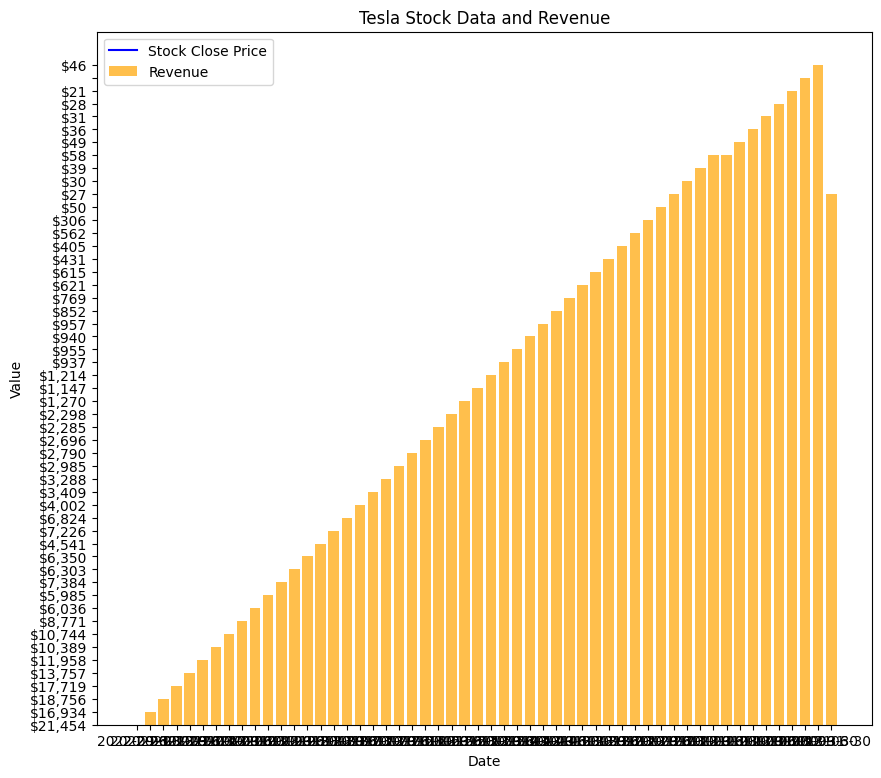

In [76]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
  
    stock_dates = stock_data['Date']
    stock_close_prices = stock_data['Close']

    revenue_dates = revenue_data['Date']
    revenue_values = revenue_data['Revenue']

    plt.figure(figsize=(10, 9))
    plt.plot(stock_dates, stock_close_prices, label='Stock Close Price', color='blue')
    
    plt.bar(revenue_dates, revenue_values, label='Revenue', color='orange', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{company_name} Stock Data and Revenue')
    plt.legend()

    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')

# Question 6 - GameStop Stock and Revenue Dashboard

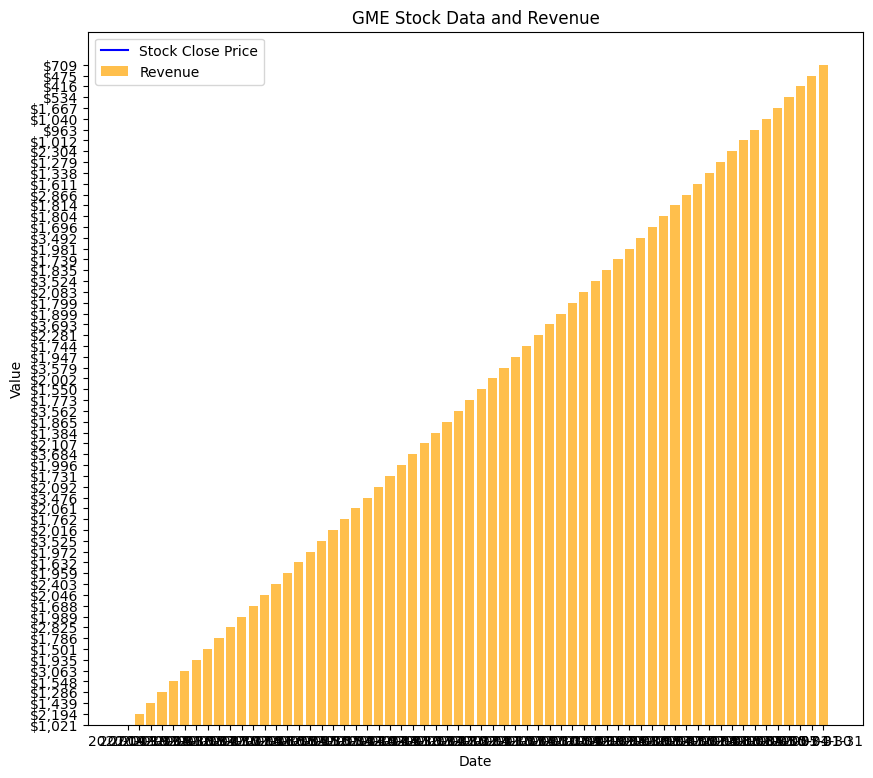

In [77]:
make_graph(GME_data, GME_revenue, 'GME')